<a href="https://colab.research.google.com/github/rakeshrocky58008/pytorch/blob/main/section3_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


Fashion Mnist

In [ ]:
#setup training data

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.29MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 150kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.64MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.8MB/s]


In [ ]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image , label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

image shape: torch.Size([1, 28, 28]), label: 9
Image shape after squeeze : torch.Size([28, 28])


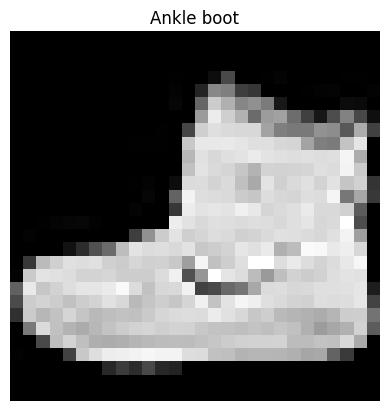

In [ ]:
  ##  vizualizing our data


import matplotlib.pyplot as plt
import numpy as np

image , label = train_data[0]
image.shape, label

print(f"image shape: {image.shape}, label: {label}")
print(f"Image shape after squeeze : {image.squeeze().shape}")

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
plt.show()

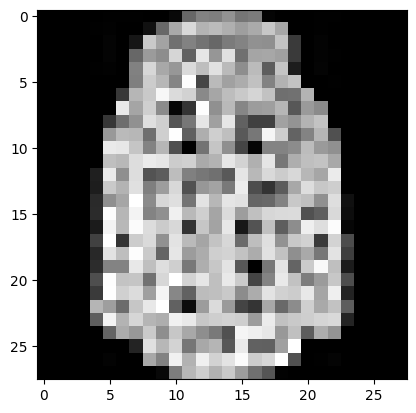

In [ ]:
plt.imshow(train_data[torch.randperm(len(train_data))[1]][0].squeeze(), cmap="gray")
plt.show()

In [ ]:
# prepare data loader
# pytorch datasets

train_data , test_data


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
# turn data into batches & mini batches

# Dataloader turn dataset into python iterable


from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader = DataLoader(dataset=train_data,shuffle= True, batch_size=BATCH_SIZE)


test_dataloader = DataLoader(dataset=test_data,shuffle=False,batch_size=BATCH_SIZE)


In [ ]:
train_features_batch , train_lables_batch = next(iter(train_dataloader))



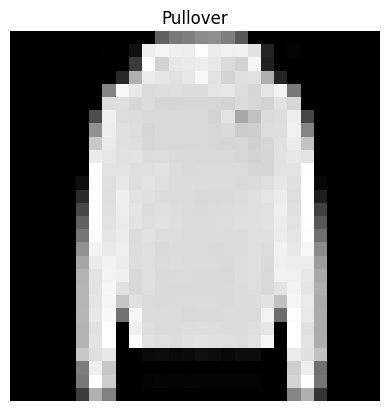

In [ ]:
#torch.manual_seed(42)
ramdom_idx = []
ramdom_idx = torch.randint(0, len(train_features_batch),size=[1]).item()
img , label = train_features_batch[ramdom_idx], train_lables_batch[ramdom_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
plt.show()

In [ ]:
## 3 DataModel

# when starting to build series of ML experiments , baseline model
# A baselie model is simple model , will try add complex


# create a flatten layer

flatten_model = nn.Flatten()


# get a single sample

x = train_features_batch[0]
x.shape , x

(torch.Size([1, 28, 28]),
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.4667, 0.3294, 0.3569, 0.4353,
           0.5529, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.1686, 0.6549, 0.7255, 0.5373, 0.8510,
           0.9961, 0.1843, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0157, 0.3137, 0.3294, 0.2118, 0.2784, 0.8863, 0.8784, 0.8784,
           0.6314, 0.2784, 0.2118, 0.2706, 0.1529, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0235, 0.2784, 0.1686, 0.2471, 0.0157, 0.6471, 0.9451, 0.5882,
           0.1608

In [ ]:
output = flatten_model(x)
output.shape , output



(torch.Size([1, 784]),
 tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.4667, 0.3294, 0.3569, 0.4353, 0.5529, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.1686, 0.6549, 0.7255, 0.5373, 0.8510, 0.9961,
          0.1843, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0157, 0.3137, 0.3294, 0.2118, 0.2784, 0.8863, 0.8784, 0.8784,
          0.6314, 0.2784, 0.2118, 0.2706, 0.1529, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0235, 0.2784, 0.1686, 0.2471, 0.0157, 0.6471, 0.9451,
          0.5882, 0.1608, 0.2549, 0.0588, 0.1765, 0.1686, 0.0000, 0.0000, 0

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int , hidden_units:  int , output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(784,10,len(class_names)).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# setup loss optimizer

import requests

from pathlib import Path

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

file = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
  f.write(file.content)

from helper_functions import accuracy_fn


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float , end: float , device: torch.device = None ):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs= 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n...")
  train_loss = 0
  #Add loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
      model_0.train()
      y_pred = model_0(X)
      loss = loss_fn(y_pred,y)

      train_loss += loss

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch % 400 == 0:
         print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  print(f"Train loss: {train_loss/len(train_dataloader)}")


  test_loss, test_acc = 0 ,0

  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred,y_test)

      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
  print(f"Test loss: {test_loss/len(test_dataloader)} , Test Accuracy : {test_acc/len(test_dataloader)}")

train_time_end_on_cpu=timer()
train_time_end_model_0 =  print_train_time(start=train_time_start_on_cpu,end=train_time_end_on_cpu,device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
...
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.5903892517089844
Test loss: 0.5095350742340088 , Test Accuracy : 82.03873801916933
Epoch : 1
...
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4763319790363312
Test loss: 0.47988998889923096 , Test Accuracy : 83.19688498402556
Epoch : 2
...
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4550333023071289
Test loss: 0.47663894295692444 , Test Accuracy : 83.42651757188499
Train time on cpu: 25.908 seconds


In [ ]:
# make predections and get model 0 results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn ):
  """ Return Dictonary containg results of model predecting data_loader"""

  loss , acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      y_pred = model(X)
      loss += loss_fn(y_pred, y )
      acc += accuracy_fn(y_pred=y_pred.argmax(dim=1),y_true=y)

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

#Set up to GPU

In [ ]:
!nvidia-smi

Fri Oct 24 04:59:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape: int,hidden_units:  int ,
                          output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784,10,len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

Function training & testing loop

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 34.596 seconds


In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device ):
  """ Return Dictonary containg results of model predecting data_loader"""

  loss , acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      X,y = X.to(device), y.to(device)

      y_pred = model(X)
      loss += loss_fn(y_pred, y )
      acc += accuracy_fn(y_pred=y_pred.argmax(dim=1),y_true=y)

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
model_1_results = eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Convolutional Neural Network  - https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create conv NN

class FashionMNISTModelV2(nn.Module):
  """
  Model Arch that replicates TinyVGG
  model from CNN explainer website.
  """

  def __init__(self, input_shape: int, hidden_units: int , output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ), # hyper parms , vals we can set ourselves
        nn.RReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.RReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7, # trick to calculatin this
                  out_features=output_shape)
    )

  def forward(self,x: torch.FloatTensor):
    x = self.conv_block_1(x)
   # print(f"output shape of conv block 1:  {x.shape}")
    x = self.conv_block_2(x)
    #print(f"output shape of conv block 2:  {x.shape}")
    x = self.classifier(x)
    #print(f"output shape of classifier :  {x.shape}")
    return x




In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)
                              )

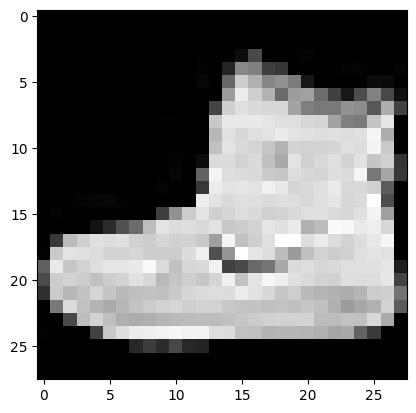

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(image.unsqueeze(0))

tensor([[ 0.0272, -0.0636,  0.0537, -0.0375, -0.0138,  0.0134,  0.0019, -0.0094,
          0.0202,  0.0058]], grad_fn=<AddmmBackward0>)

In [ ]:
## stepping through conv2d

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))

test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"test image:\n {test_image}")


image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
 # create a single con2d layer

conv_layer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=1)

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [ ]:
# maxpool layer
print(f"Test image orifginals shape : {test_image.shape}")
print(f"Test image with unsquueze : {test_image.unsqueeze(0).shape} ")
max_pool_layer = nn.MaxPool2d(kernel_size=2)


test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"test image after conv_layer : {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after going through conv & maxpool: {test_image_through_conv_and_max_pool.shape}")

Test image orifginals shape : torch.Size([3, 64, 64])
Test image with unsquueze : torch.Size([1, 3, 64, 64]) 
test image after conv_layer : torch.Size([1, 10, 64, 64])
shape after going through conv & maxpool: torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)

print(f"Randon_tensor: \n {random_tensor} \n\nrandom_tnsor_shape : {random_tensor.shape} ")
print(f"Maxpool tensor : \n {max_pool_tensor} \n\nmax_pool_tensor_shape: {max_pool_tensor.shape}")


Randon_tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) 

random_tnsor_shape : torch.Size([1, 1, 2, 2]) 
Maxpool tensor : 
 tensor([[[[0.3367]]]]) 

max_pool_tensor_shape: torch.Size([1, 1, 1, 1])


In [ ]:
dummy_vgg_tensor = torch.randn(size=(1,4,4))

In [ ]:
dummy_vgg_tensor

tensor([[[ 1.7878, -0.4780, -0.2429, -0.9342],
         [-0.2483, -1.2082, -0.4777,  0.5201],
         [-1.5673, -0.2394,  2.3228, -0.9634],
         [ 2.0024,  0.4664,  1.5730, -0.9228]]])

In [ ]:
dummy_model_vgg = FashionMNISTModelV2(1,5,3)

In [ ]:
dummy_model_vgg.parameters()

<generator object Module.parameters at 0x7c1446340ba0>

In [ ]:
dummy_model_vgg.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.2631, -0.1537, -0.0941],
                        [-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573]]],
              
              
                      [[[ 0.0555, -0.1082,  0.2060],
                        [ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904]]],
              
              
                      [[[ 0.1403,  0.2976,  0.1927],
                        [-0.1457,  0.1924,  0.0596],
                        [ 0.1693, -0.2032, -0.3300]]],
              
              
                      [[[-0.1288, -0.2557,  0.2735],
                        [ 0.0960,  0.1381,  0.1054],
                        [-0.0058,  0.2609, -0.2368]]],
              
              
                      [[[ 0.0210, -0.2275,  0.1028],
                        [-0.1148,  0.1021, -0.0694],
                        [ 0.2765, -0.1976, -0.1988]]]])),
             ('conv_block_1.0.bia

In [ ]:
## Training CNN loss fun & optimizer

from helper_functions import accuracy_fn

loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),lr=0.1)


In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
## traing & testing model 2

from timeit import default_timer as timer
torch.manual_seed(42)
epochs = 3

# Move model to target device
model_2.to(device)

train_time_start_cnn = timer()
print(f" Epochs: {epochs}\n.......")

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n--------")
  train_step(model=model_2,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn)

  test_step(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

train_time_end_cnn = timer()

total_train_time_model_0_cnn = print_train_time(train_time_start_cnn,train_time_end_cnn, device=device) # Added device to print_train_time
print(f"total train time : {total_train_time_model_0_cnn}")

 Epochs: 3
.......


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
--------
Train loss: 0.60965 | Train accuracy: 77.95%
Test loss: 0.40595 | Test accuracy: 85.85%

Epoch : 1
--------
Train loss: 0.36506 | Train accuracy: 86.78%
Test loss: 0.35952 | Test accuracy: 86.95%

Epoch : 2
--------
Train loss: 0.32420 | Train accuracy: 88.31%
Test loss: 0.32965 | Test accuracy: 88.75%

Train time on cuda: 36.463 seconds
total train time : 36.46301445


In [ ]:
model_2_results = eval_model(model=model_2,data_loader=train_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

  0%|          | 0/1875 [00:00<?, ?it/s]

In [ ]:
model_2_results

{'model': 'FashionMNISTModelV2',
 'model_loss': 0.28836360573768616,
 'model_acc': 89.45333333333333}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.288364,89.453333


In [ ]:
compare_results["training_time"] = [train_time_end_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_0_cnn]

compare_results

,model,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,25.908457
1,FashionMNISTModelV1,0.685001,75.019968,34.596318
2,FashionMNISTModelV2,0.288364,89.453333,36.463014


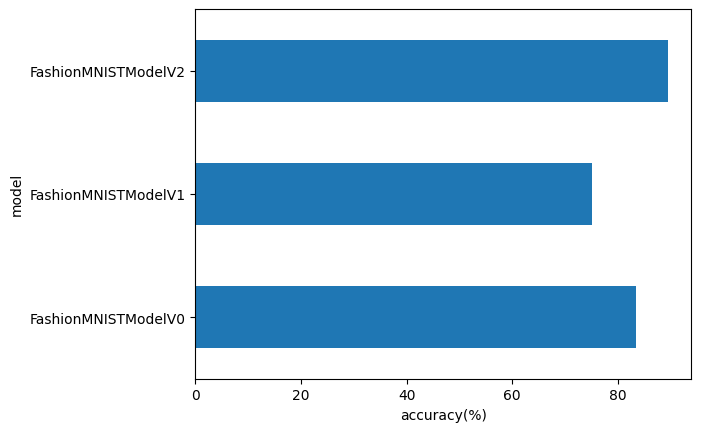

In [ ]:
#visualize model result

compare_results.set_index("model")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model");

In [ ]:
# make and eval random pred with best model

def make_predections(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device ):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass
      pred_logit = model(sample)

      # get pred prob (logint -> pred )
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred_prob off Gpu for further calculation

      pred_probs.append(pred_prob.cpu())

  # Stack the pred_prob to tensor

  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

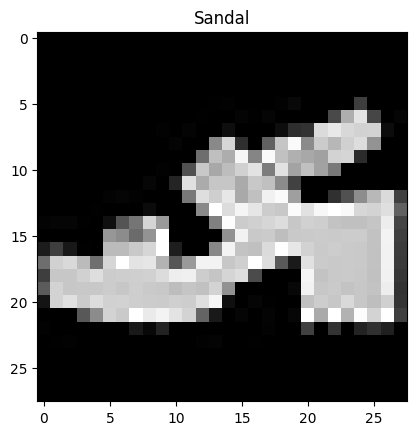

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs = make_predections(model=model_2,
                               data=test_samples)

 # view prob list
pred_probs[:2]

tensor([[3.0689e-07, 2.2129e-08, 2.5434e-08, 5.2010e-08, 6.1922e-09, 9.9989e-01,
         1.5337e-06, 1.4612e-05, 1.4103e-05, 8.1198e-05],
        [9.6866e-03, 9.5120e-01, 1.2432e-05, 1.2326e-02, 1.3323e-02, 1.7836e-05,
         1.3385e-02, 4.2414e-05, 6.9900e-06, 1.9814e-06]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

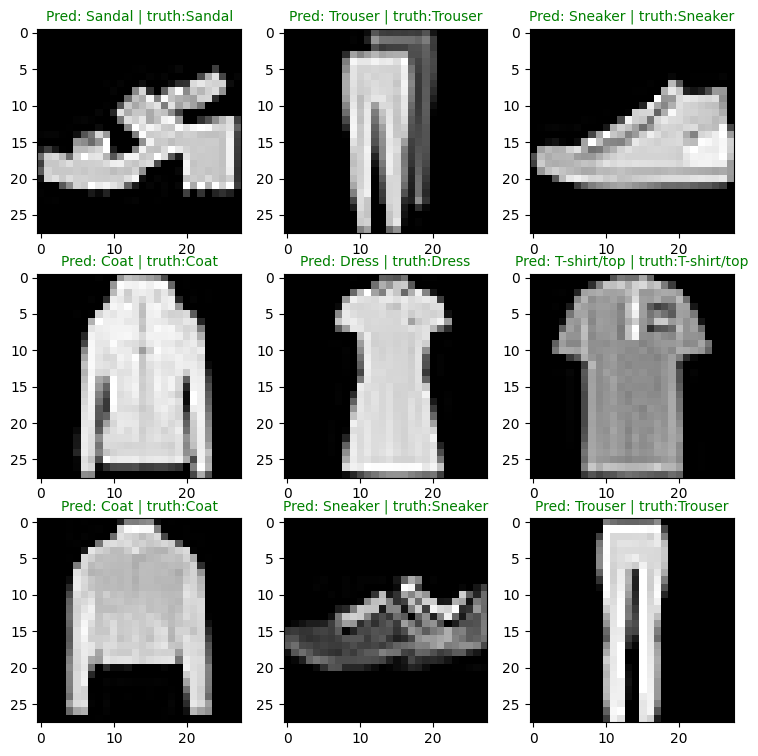

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  # get truth label
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | truth:{truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")


In [ ]:
# making confusion matrix  evalvulatin classification models
#1. make predections on our model
#2. make a confusion matric 'torchmetrics.ConfusionMatrix'
#3. plot confusion matrix mlxtend.plotting.plot_confusion_matrix()


from tqdm.auto import tqdm

import mlxtend

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Mkaing predections ..."):
    X,y = X.to(device), y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit.squeeze(), dim= 0 ).argmax(dim=1)

    y_preds.append(y_pred.cpu())

    #print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]



Mkaing predections ...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
try:
  import torchmetrics , mlxtend
  print(f"mlxtend version : {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>= 19, "mlxtend version shld be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics , mlxtend
  print(f"mlxtend version : {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 60.3 MB/s eta 0:00:00
mlxtend version : 0.23.4


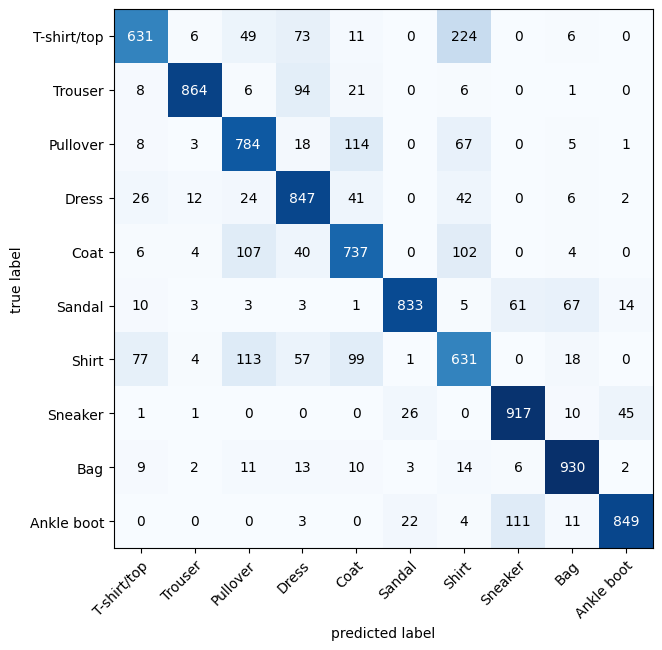

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2 setup confusion & compare predsd to targets

confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,target= test_data.targets)

#3
confmat_tensor

fic ,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

SAve and load model

In [ ]:
from pathlib import Path

# create

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vison_model_2.pth"

MODEL_SAVE_PATH= MODEL_PATH/ MODEL_NAME
MODEL_SAVE_PATH

print(f"Saving model to : {MODEL_SAVE_PATH}")

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH
           )

Saving model to : models/03_pytorch_computer_vison_model_2.pth


In [ ]:
# create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names)
                                     )

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): RReLU(lower=0.125, upper=0.3333333333333333)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(loaded_model_2, test_dataloader,loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
loaded_model_2_results

{'model': 'FashionMNISTModelV2',
 'model_loss': 0.32965287566185,
 'model_acc': 88.74800319488818}

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(False)